# Project 4 - Predicting Terrorism

In [1]:
import pandas as pd
import glob
import pandas as pd
import numpy as np

db = '/Users/jennydoyle/Desktop/dsi/04-project-assets/globalterrorismdb_0616dist.csv'
df = pd.read_csv(db, header=0,low_memory=False)
print 'Size = ',len(df)

Size =  156772


# I. EDA

In [2]:
def eda(dataframe):
    from IPython.core import display as ICD
    print "dataframe shape: ",dataframe.shape      ## rows by columns
    print ''
    print 'num duplicates:', dataframe.duplicated().sum() ## df.drop_duplicates() to remove dupes
    print ''
    print "pct missing values \n"
    ICD.display(pd.DataFrame(dataframe.isnull().sum()/len(df)*100),columns=['Columns','Pct Missing']), ## count number of null values per column
    print ''
    print "dataframe types \n"
    ICD.display(pd.DataFrame(dataframe.dtypes),columns=['Columns','Dtype'])       ## list data type of each column
    print ''
    print "dataframe describe \n"
    ICD.display(pd.DataFrame(dataframe.describe()))## stats -- mean, min, max, etc.. 
    print ''
    print '# unique values in series:\n'
    u_list = []
    for item in dataframe:                             ## count number of unique values per column
        u_list.append([item, dataframe[item].nunique()])
    unique_vals = pd.DataFrame(u_list,columns=['Column','Num_unique'])
    ICD.display(unique_vals)

eda(df)

dataframe shape:  (156772, 137)

num duplicates: 0

pct missing values 



0
eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
approxdate          96.966295
extended             0.000000
resolution          97.766183
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            9.261858
city                 0.284490
latitude             2.882530
longitude            2.882530
specificity          0.000000
vicinity             0.000000
location            73.074911
summary             42.188656
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000638
alternative         84.540607
alternative_txt      0.000000
multiple             0.000000
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
...                       ...
propextent          64.054806
propextent_txt       0.000000
propvalue           80.027046
propcomment         68.475238
ishostkid            0.113541
nhostkid            92.812492
nhostkidus          92.847575
nhours              97.893757
ndays               95.801546
divert              99.815656
kidhijcountry       97.901411
ransom              52.101141
ransomamt           99.237747
ransomamtus         99.737836
ransompaid          99.602608
ransompaidus        99.743577
ransomnote          99.731457
hostkidoutcome      94.460108
hostkidoutcome_txt   0.000000
nreleased           94.836450
addnotes            86.015360
scite1              42.309851
scite2              60.987294
scite3              78.228255
dbsource             0.000000
INT_LOG              0.000000
INT_IDEO             0.000000
INT_MISC             0.000000
INT_ANY              0.000000
related             86.973439

[137 rows x 1 columns]


dataframe types 



0
eventid               int64
iyear                 int64
imonth                int64
iday                  int64
approxdate           object
extended              int64
resolution           object
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity           int64
vicinity              int64
location             object
summary              object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
alternative         float64
alternative_txt      object
multiple              int64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
...                     ...
propextent          float64
propextent_txt       object
propvalue           float64
propcomment          object
ishostkid           float64
nhostkid            float64
nhostkidus          float64
nhours              float64
ndays               float64
divert               object
kidhijcountry        object
ransom              float64
ransomamt           float64
ransomamtus         float64
ransompaid          float64
ransompaidus        float64
ransomnote           object
hostkidoutcome      float64
hostkidoutcome_txt   object
nreleased           float64
addnotes             object
scite1               object
scite2               object
scite3               object
dbsource             object
INT_LOG               int64
INT_IDEO              int64
INT_MISC              int64
INT_ANY               int64
related              object

[137 rows x 1 columns]


dataframe describe 



eventid          iyear         imonth           iday  \
count  1.567720e+05  156772.000000  156772.000000  156772.000000   
mean   2.000541e+11    2000.474083       6.484666      15.455215   
std    1.298283e+09      12.982397       3.392225       8.815533   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.989082e+11    1989.000000       4.000000       8.000000   
50%    2.005071e+11    2005.000000       6.000000      15.000000   
75%    2.013060e+11    2013.000000       9.000000      23.000000   
max    2.015123e+11    2015.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  156772.000000  156772.000000  156772.000000  152253.000000   
mean        0.041347     133.087401       6.970097      23.190988   
std         0.199091     113.946290       2.967803      19.220723   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      69.000000       5.000000      10.756961   
50%         0.000000     101.000000       6.000000      31.285506   
75%         0.000000     160.000000      10.000000      34.842222   
max         1.000000    1004.000000      12.000000      74.633553   

           longitude    specificity      ...           ransomamt  \
count  152253.000000  156772.000000      ...        1.195000e+03   
mean       24.210467       1.452632      ...        3.320127e+06   
std        59.900831       1.016971      ...        3.187694e+07   
min      -176.176447       1.000000      ...       -9.900000e+01   
25%        -1.929857       1.000000      ...        0.000000e+00   
50%        41.919647       1.000000      ...        1.250000e+04   
75%        68.416974       1.000000      ...        4.115000e+05   
max       179.366667       5.000000      ...        1.000000e+09   

        ransomamtus    ransompaid  ransompaidus  hostkidoutcome    nreleased  \
count  4.110000e+02  6.230000e+02    402.000000     8685.000000  8095.000000   
mean   5.454451e+05  4.319721e+05    305.196517        4.592170   -27.788635   
std    6.665967e+06  2.589893e+06   3409.027685        2.049184    58.524976   
min   -9.900000e+01 -9.900000e+01    -99.000000        1.000000   -99.000000   
25%    0.000000e+00 -9.900000e+01      0.000000        2.000000   -99.000000   
50%    0.000000e+00  0.000000e+00      0.000000        4.000000     0.000000   
75%    0.000000e+00  4.276840e+03      0.000000        7.000000     1.000000   
max    1.320000e+08  4.100000e+07  48000.000000        7.000000  1201.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  156772.000000  156772.000000  156772.000000  156772.000000  
mean       -4.834645      -4.789114       0.093894      -4.221124  
std         4.528862       4.589779       0.602442       4.686143  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 79 columns]


# unique values in series:



Column  Num_unique
0               eventid      156772
1                 iyear          45
2                imonth          13
3                  iday          32
4            approxdate        1426
5              extended           2
6            resolution        2657
7               country         206
8           country_txt         206
9                region          12
10           region_txt          12
11            provstate        2509
12                 city       31324
13             latitude       52021
14            longitude       51632
15          specificity           5
16             vicinity           3
17             location       35794
18              summary       34335
19                crit1           2
20                crit2           2
21                crit3           2
22            doubtterr           3
23          alternative           5
24      alternative_txt           6
25             multiple           2
26              success           2
27              suicide           2
28          attacktype1           9
29      attacktype1_txt           9
..                  ...         ...
107          propextent           4
108      propextent_txt           5
109           propvalue         604
110         propcomment       17437
111           ishostkid           3
112            nhostkid         221
113          nhostkidus          28
114              nhours          34
115               ndays         289
116              divert         142
117       kidhijcountry         217
118              ransom           3
119           ransomamt         350
120         ransomamtus          21
121          ransompaid         122
122        ransompaidus           8
123          ransomnote         285
124      hostkidoutcome           7
125  hostkidoutcome_txt           8
126           nreleased         155
127            addnotes        9613
128              scite1       66698
129              scite2       50118
130              scite3       28489
131            dbsource          26
132             INT_LOG           3
133            INT_IDEO           3
134            INT_MISC           3
135             INT_ANY           3
136             related       18082

[137 rows x 2 columns]

#### Standardize Country Names to join Dataframes

In [3]:
import geopandas as gpd
from shapely.geometry import Point
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


fix_names = {'Dem. Rep. Korea':'South Korea',
'Korea':'North Korea',
'Czech Rep.':'Czech Republic',
'Bosnia and Herz.':'Bosnia-Herzegovina',
'Bosnia and Herzegovina':'Bosnia-Herzegovina',
'Central African Rep.': 'Central African Republic',
 'Dem. Rep. Congo':  'Congo',
'Lao PDR':'Laos',
'Slovakia':'Slovak Republic'}

world.name.replace(fix_names, inplace=True)

fix_countries = {'Democratic Republic of the Congo':'Congo',
"People's Republic of the Congo"  :'Congo',
'Republic of the Congo':'Congo',
'Dominica':'Dominican Rep.',
'Dominican Republic':'Dominican Rep.',
'Czechoslovakia': 'Czech Republic',
'East Germany (GDR)':'Germany',
'East Timor':'Timor-Leste', 
'Equatorial Guinea':'Eq. Guinea',                
'Falkland Islands':'Falkland Is.',
'Hong Kong':'China',
'North Yemen':'Yemen',
'Serbia-Montenegro':'Serbia',
'Solomon Islands':'Solomon Is.',
'South Sudan':'Sudan',
'South Vietnam':'Vietnam',
'South Yemen':'Yemen',
'Soviet Union':'Russia',
'West Germany (FRG)':'Germany',                 
'Western Sahara':'W. Sahara'}

df.country_txt.replace(fix_countries, inplace=True)

### Types of Attacks

In [4]:
df.attacktype1_txt.value_counts()

Bombing/Explosion                      75963
Armed Assault                          37554
Assassination                          17582
Hostage Taking (Kidnapping)             9115
Facility/Infrastructure Attack          8849
Unknown                                 5490
Hostage Taking (Barricade Incident)      835
Unarmed Assault                          828
Hijacking                                556
Name: attacktype1_txt, dtype: int64

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'

plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

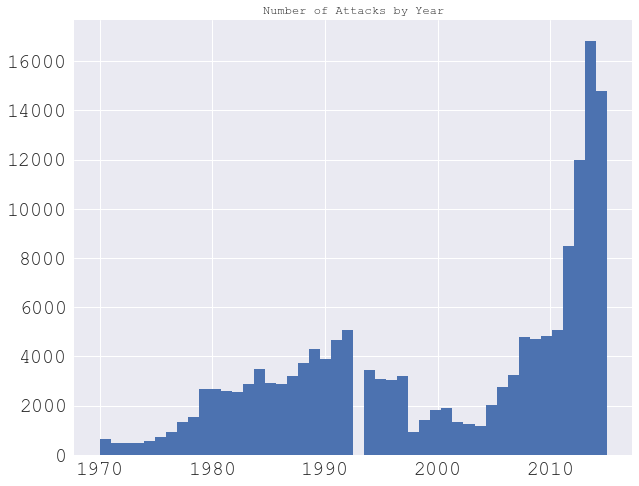

In [61]:
plt.hist(df.iyear,bins=46)
plt.title('Number of Attacks by Year')
plt.show()

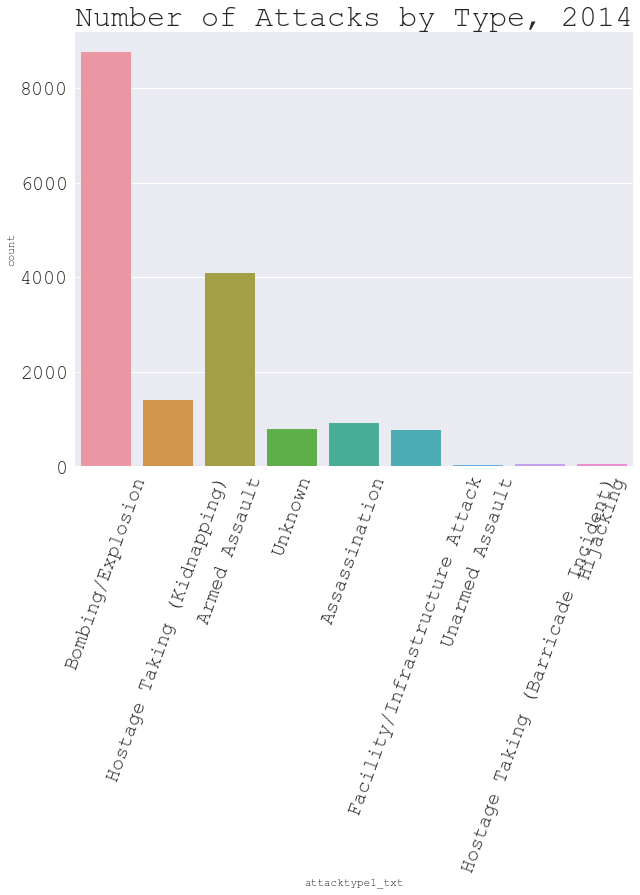

In [62]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
sns.countplot(x="attacktype1_txt", data=df[df.iyear==2014])
plt.title('Number of Attacks by Type, 2014',size=30)
plt.xticks(rotation=70)
plt.show()

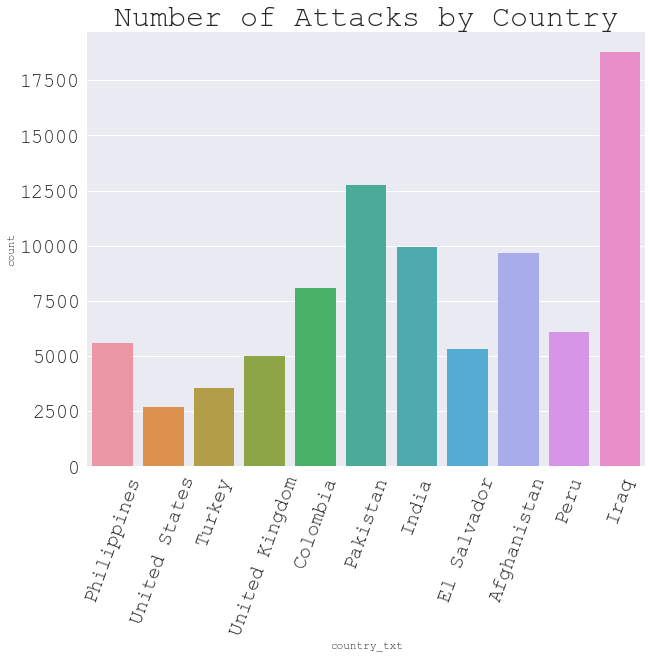

In [63]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
countries = df.groupby(['country_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
countries = list(countries.country_txt)
countries.append('United States')
mask = df[df.country_txt.isin(countries)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country',size=30)
plt.xticks(rotation=70)
plt.show()

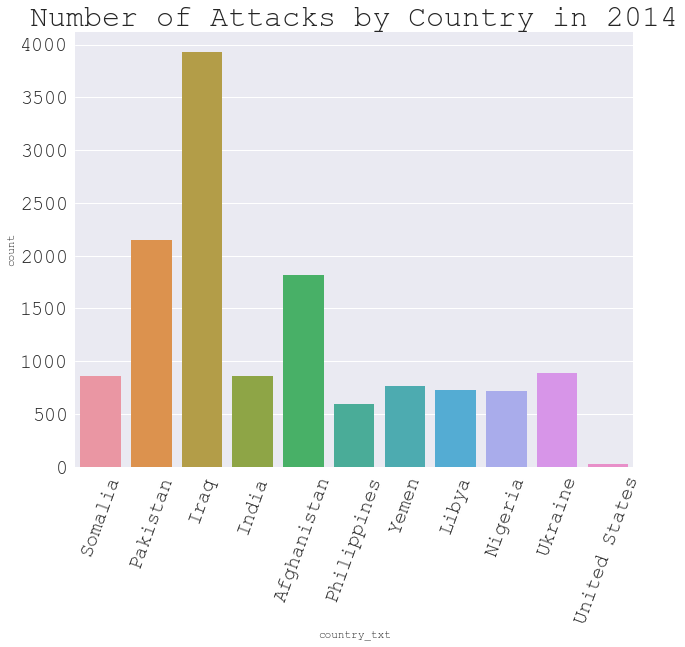

In [64]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
countries = df[df.iyear==2014].groupby(['country_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
countries = list(countries.country_txt)
countries.append('United States')
mask = df[(df.country_txt.isin(countries))&(df.iyear==2014)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country in 2014',size=30)
plt.xticks(rotation=70)
plt.show()

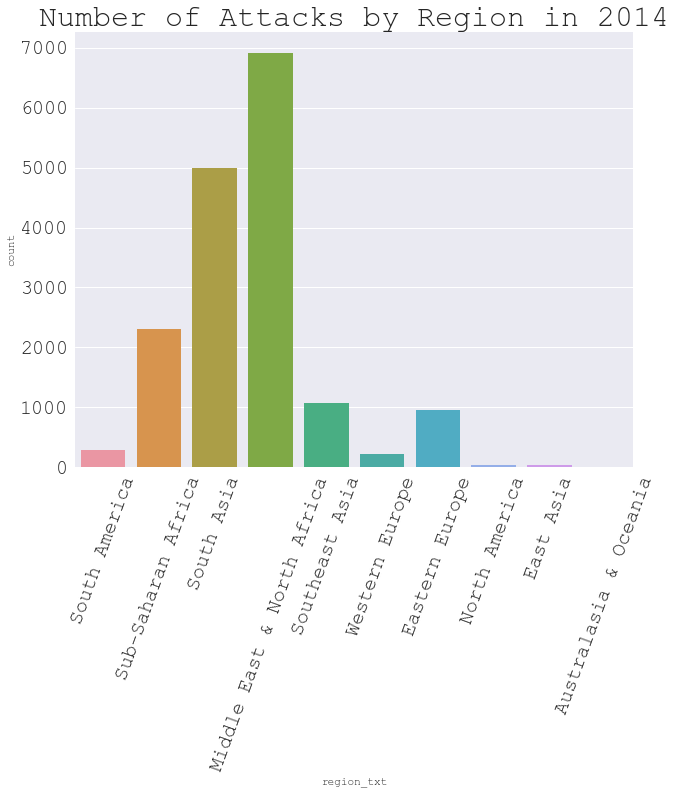

In [65]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
regions = df[df.iyear==2014].groupby(['region_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
regions = list(regions.region_txt)
mask = df[(df.region_txt.isin(regions))&(df.iyear==2014)]
sns.countplot(x="region_txt", data=mask)
plt.title('Number of Attacks by Region in 2014',size=30)
plt.xticks(rotation=70)
plt.show()

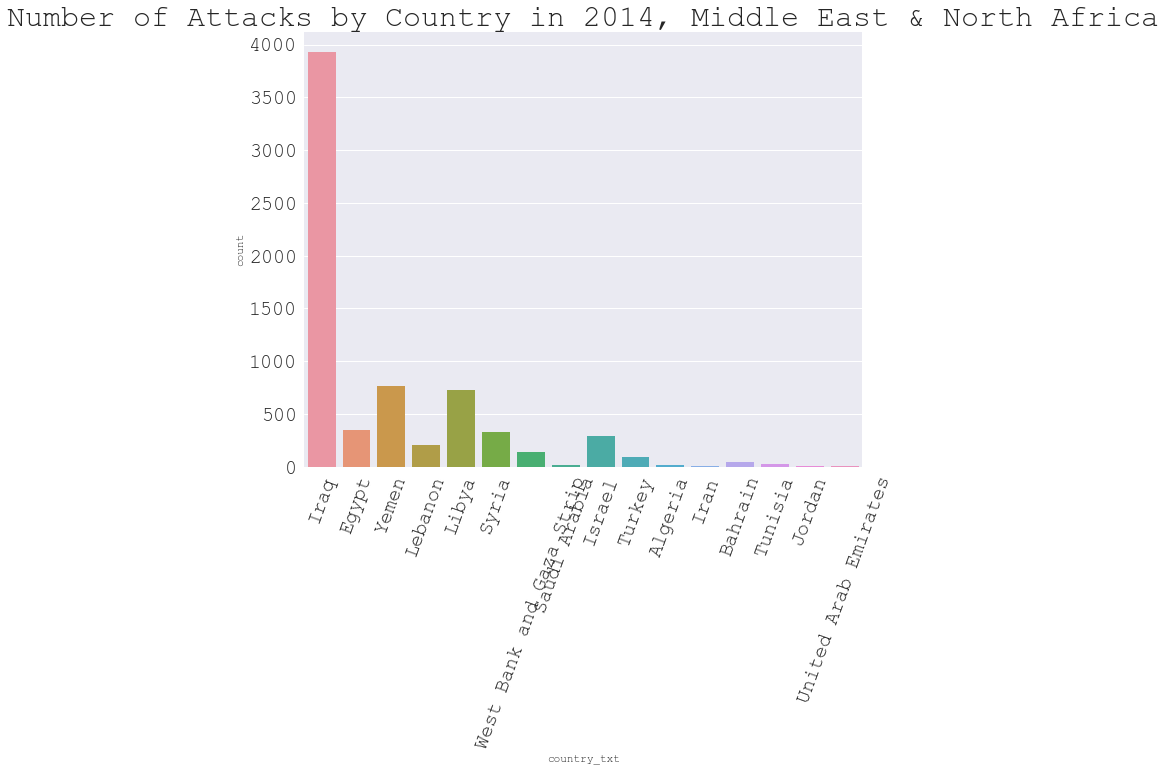

In [66]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
mask = df[(df.region_txt=='Middle East & North Africa')&(df.iyear==2014)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country in 2014, Middle East & North Africa',size=30)
plt.xticks(rotation=70)
plt.show()

In [121]:
# type(gnames.remove('Unknown'))
gnames[1:]

['Islamic State of Iraq and the Levant (ISIL)',
 'Taliban',
 'Al-Shabaab',
 'Boko Haram',
 "Donetsk People's Republic",
 "New People's Army (NPA)",
 'Al-Qaida in the Arabian Peninsula (AQAP)',
 'Maoists',
 'Tehrik-i-Taliban Pakistan (TTP)',
 'Revolutionary Armed Forces of Colombia (FARC)']

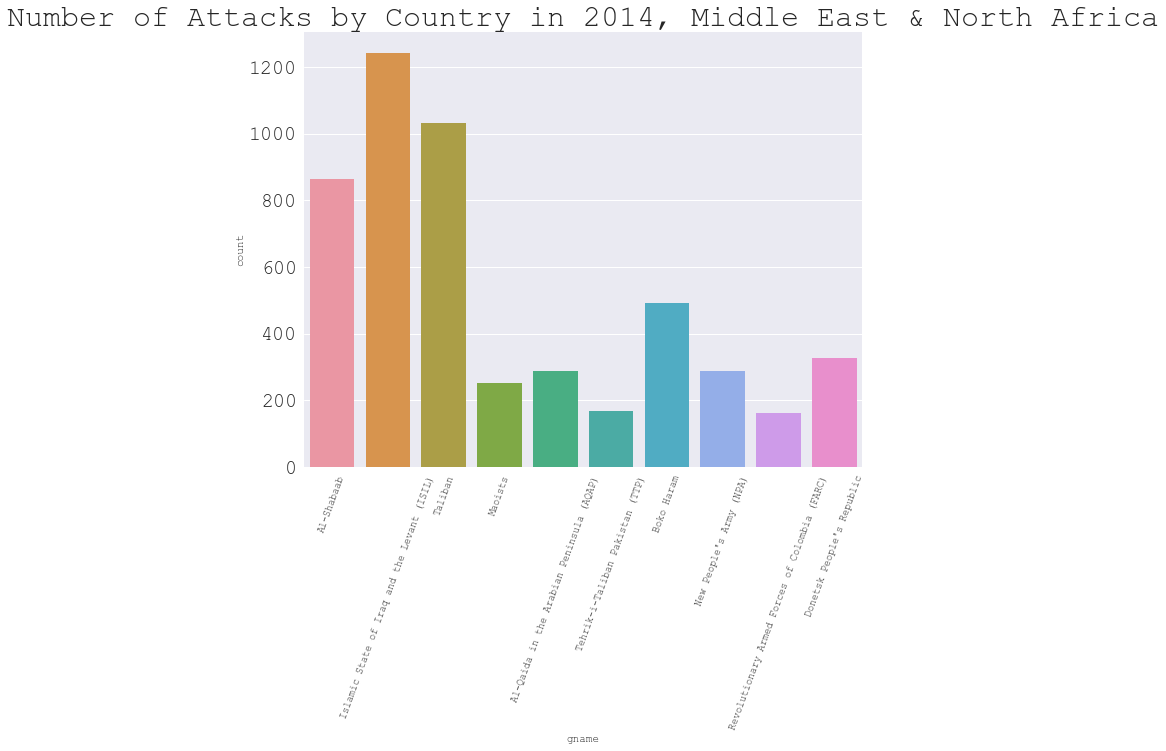

In [124]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 10 
plt.rcParams['ytick.labelsize'] = 20 
gnames = df[df.iyear==2014].groupby(['gname']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:11]
gnames = list(gnames.gname)[1:]
mask = df[(df.gname.isin(gnames))&(df.iyear==2014)]
sns.countplot(x="gname", data=mask)
plt.title('Number of Attacks by Country in 2014, Middle East & North Africa',size=30)
plt.xticks(rotation=70)
plt.show()

In [144]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000



eventid  iyear  imonth  iday approxdate  extended resolution  \
73051  200109110001   2001       9    11        NaN         0        NaN   
73052  200109110002   2001       9    11        NaN         0        NaN   
73053  200109110003   2001       9    11        NaN         0        NaN   
73054  200109110004   2001       9    11        NaN         0        NaN   
73055  200109110005   2001       9    11        NaN         0        NaN   
73056  200109110006   2001       9    11        NaN         0        NaN   
73057  200109110007   2001       9    11        NaN         0        NaN   
73058  200109110008   2001       9    11        NaN         0        NaN   

       country    country_txt  region                  region_txt  \
73051       34        Burundi      11          Sub-Saharan Africa   
73052      229          Congo      11          Sub-Saharan Africa   
73053       97         Israel      10  Middle East & North Africa   
73054      217  United States       1               North America   
73055      217  United States       1               North America   
73056      217  United States       1               North America   
73057      217  United States       1               North America   
73058       12        Armenia       7                Central Asia   

          provstate           city   latitude  longitude  specificity  \
73051         Mwaro        Gihange  -3.633892  29.709872            1   
73052    North Kivu        Muhanga  -1.049115  29.031531            1   
73053         Haifa          Magal  32.385553  35.036145            1   
73054      New York  New York City  40.712784 -74.005941            1   
73055      New York  New York City  40.712784 -74.005941            1   
73056      Virginia      Arlington  38.880777 -77.108273            1   
73057  Pennsylvania    Shanksville  40.018464 -78.907197            1   
73058       Yerevan        Yerevan  40.183333  44.516667            1   

       vicinity                                           location  \
73051         1  This incident occurred on a road near Gihange ...   
73052         0                                                NaN   
73053         1                                                NaN   
73054         0                                                NaN   
73055         0                                                NaN   
73056         0                                                NaN   
73057         1  The hijacked plane crash-landed 150 miles nort...   
73058         0                             A residence in Yerevan   

                                                 summary  crit1  crit2  crit3  \
73051  ##############################################...      1      1      1   
73052  ##############################################...      1      1      1   
73053  09/11/2001: Two border policemen were killed a...      1      1      1   
73054  ##############################################...      1      1      1   
73055  ##############################################...      1      1      1   
73056  ##############################################...      1      1      1   
73057  ##############################################...      1      1      1   
73058  ##############################################...      1      1      1   

       doubtterr  alternative alternative_txt  multiple  success  suicide  \
73051        0.0          NaN               .         0        1        0   
73052        0.0          NaN               .         0        1        0   
73053        0.0          NaN               .         0        1        0   
73054        0.0          NaN               .         1        1        1   
73055        0.0          NaN               .         1        1        1   
73056        0.0          NaN               .         1        1        1   
73057        0.0          NaN               .         1        1        1   
73058        0.0          NaN               .         0        1      

In [128]:

# POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)
# INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER
# AUDIENCE(S) (CRIT2)
# OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)

feats = ['eventid','iyear','country_txt','region_txt','attacktype1_txt','attacktype2_txt','attacktype3_txt','crit1', 'crit2', 'crit3','success','suicide','weaptype1_txt','targtype1_txt','corp1','target1','natlty1_txt','gname','nperps','nkill','nwound','nhostkid','ransom']
df2 = df[feats]
# list(df.columns)

In [132]:
df2 = df2[df2.country_txt.isin(['Iraq','Pakistan'])]

In [141]:
df2[df2.gname.isin(['Tehrik-i-Taliban Pakistan (TTP)','Islamic State of Iraq and the Levant (ISIL)'])].attacktype1_txt.value_counts()

Bombing/Explosion                      2186
Armed Assault                           497
Hostage Taking (Kidnapping)             368
Unknown                                 257
Assassination                           174
Facility/Infrastructure Attack           60
Hostage Taking (Barricade Incident)      17
Hijacking                                 7
Unarmed Assault                           4
Name: attacktype1_txt, dtype: int64

In [145]:
df_before = df[df.region_txt=='Middle East & North Africa'][(df.iyear<=2001)&(df.imonth<=9)&(df.iday<=11)]

In [150]:
pd.to_datetime((df.iyear,df.imonth,df.iday))

TypeError: arg must be a string, datetime, list, tuple, 1-d array, or Series

In [138]:
'Islamic State of Iraq and the Levant (ISIL)'
'Tehrik-i-Taliban Pakistan (TTP)'
'Al-Qaida'

Unknown                                                                       24919
Islamic State of Iraq and the Levant (ISIL)                                    2430
Tehrik-i-Taliban Pakistan (TTP)                                                1140
Al-Qaida in Iraq                                                                629
Baloch Republican Army (BRA)                                                    277
Muttahida Qami Movement (MQM)                                                   170
Baloch Liberation Army (BLA)                                                    145
Islamic State of Iraq (ISI)                                                     144
Baloch Liberation Front (BLF)                                                   125
Lashkar-e-Islam (Pakistan)                                                      112
Gunmen                                                                           97
Lashkar-e-Jhangvi                                                           

In [20]:
bombings = df[['iyear','country_txt','latitude','longitude','attacktype1_txt']][df.attacktype1_txt=='Bombing/Explosion']
bombings = bombings.groupby(['iyear','country_txt','latitude','longitude']).attacktype1_txt.count().reset_index()

In [ ]:
bombings = bombings.merge(world[['name','geometry','iso_a3','pop_est']],how='left', left_on='country_txt', right_on='name').drop('name',axis=1)

In [ ]:
bombings.dropna(inplace=True)
type(bombings)

In [ ]:
import os
import pandas as pd
import numpy as np
from random import randint, uniform
from datetime import datetime
from urllib import urlretrieve
from zipfile import ZipFile
import pysal

# geo stuff
import geopandas as gpd
from shapely.geometry import Point
# from ipyleaflet import (Map,
#     Marker,
#     TileLayer, ImageOverlay,
#     Polyline, Polygon, Rectangle, Circle, CircleMarker,
#     GeoJSON,
#     DrawControl
# )

# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (20.0, 20.0)

# widget stuff
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

# progress stuff
from tqdm import tqdm_notebook, tqdm_pandas

# turn warnings off
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pysal
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
terror = pd.read_csv('/Users/jennydoyle/Desktop/dsi/04-project-assets/globalterrorismdb_0616dist.csv')


fix_names = {'Dem. Rep. Korea':'South Korea',
'Korea':'North Korea',
'Czech Rep.':'Czech Republic',
'Bosnia and Herz.':'Bosnia-Herzegovina',
'Bosnia and Herzegovina':'Bosnia-Herzegovina',
'Central African Rep.': 'Central African Republic',
 'Dem. Rep. Congo':  'Congo',
'Lao PDR':'Laos',
'Slovakia':'Slovak Republic'}

world.name.replace(fix_names, inplace=True)

fix_countries = {'Democratic Republic of the Congo':'Congo',
"People's Republic of the Congo"  :'Congo',
'Republic of the Congo':'Congo',
'Dominica':'Dominican Rep.',
'Dominican Republic':'Dominican Rep.',
'Czechoslovakia': 'Czech Republic',
'East Germany (GDR)':'Germany',
'East Timor':'Timor-Leste', 
'Equatorial Guinea':'Eq. Guinea',                
'Falkland Islands':'Falkland Is.',
'Hong Kong':'China',
'North Yemen':'Yemen',
'Serbia-Montenegro':'Serbia',
'Solomon Islands':'Solomon Is.',
'South Sudan':'Sudan',
'South Vietnam':'Vietnam',
'South Yemen':'Yemen',
'Soviet Union':'Russia',
'West Germany (FRG)':'Germany',                 
'Western Sahara':'W. Sahara'}

terror.country_txt.replace(fix_countries, inplace=True)


terror_grouped = terror.groupby('country_txt').count().reset_index()
terror_grouped = terror_grouped[['country_txt','eventid']]
terror_grouped.rename(columns={'eventid':'Num_Tattacks'},inplace=True)

world_terror = world.merge(terror_grouped, left_on='name', right_on='country_txt')

q10 = pysal.Quantiles(world_terror.Num_Tattacks,k=10)
f, ax = plt.subplots(1, figsize=(20,10))
world_terror.assign(cl=q10.yb).plot(column='Num_Tattacks', categorical=True, cmap='OrRd', linewidth=0.1, ax=ax, k=10, scheme='QUANTILES')
ax.set_axis_off()
plt.show()

# http://darribas.org/gds_scipy16/ipynb_md/02_geovisualization.html

In [ ]:
def make_plot(year=1970):

    # filter dataframe
    temp = world_terror[world_terror['iyear']==year]
    
    q10 = pysal.Quantiles(temp.Num_Tattacks,k=10)
    f, ax = plt.subplots(1, figsize=(20,10))
    temp.assign(cl=q10.yb).plot(column='Num_Tattacks', categorical=True, cmap='OrRd', linewidth=0.1, ax=ax, k=10, scheme='QUANTILES')
    ax.set_axis_off()
    plt.show()

In [ ]:
terror_grouped = terror[terror.attacktype1_txt=='Bombing/Explosion'].groupby(['country_txt','iyear']).count().reset_index()
terror_grouped = terror_grouped[['country_txt','iyear','eventid']]
terror_grouped.rename(columns={'eventid':'Num_Tattacks'},inplace=True)

world_terror = world.merge(terror_grouped, left_on='name', right_on='country_txt')



# http://darribas.org/gds_scipy16/ipynb_md/02_geovisualization.html





# create widget
interact(make_plot, year=(1970, 2015, 1))




In [ ]:
terror.iyear.max()

# II. Bayseian Inference

- Construct a prior about the amount of terror a given area has seen
- Update that prior with new information (like a new year of attacks or a contrasting country from within the same region).

- Compare two populations of your choosing using Bayesian inference. We want to know if the amount of terror one area has seen differs in a significant way than another area (or time period!)

For example, if you are interested in knowing if one country in South America differs in a significant way from another area, you may:

- make your prior assume that some country is a country in South America with μ average attacks and σ variation across South American countries
- update that prior with the information of a single country in South America as well as a separate country in South America
- How significantly do the resulting posteriors differ? (An important assumption made here is that the time periods are being held constant, perhaps a single year.)

- Structure your own test of populations rather than using the above example. If you're unable to setup a different test, brainstorm with your squad in the Slack chat.

- Justify the prior you selected and interpret your results (use credible intervals.) 
- Remember you can attempt to use different priors (but don't "prior hack" to affect your output!)

In [ ]:
import math
import scipy.integrate as integrate
from scipy.stats import beta

# UN comment to get the error 
#1/my_beta(141, 263)
def func1(x):
    return (x)**263*(1-x)**141

def log_beta(a,b):
    beta_num = math.exp(math.lgamma(a) + math.lgamma(b) - math.lgamma(a+b))
    return beta_num

log_beta(141,263)*integrate.quad(lambda x: func1(x) ,0, .65)[0]

We see that the $P(\theta \le .65)$ is very close to 0, and therefore we believe the poll did not provide "good" information with respect to the actual electoral results

Iraq and Pakistan, 2014